In [1]:
import neilpy
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from skimage.util import apply_parallel
from PIL import Image

In [2]:
# Load a sample dataset source from the NED around Mt. Washington.

with rasterio.open('../sample_data/sample_dem.tif') as src:
    Z = src.read(1)
    Zt = src.transform

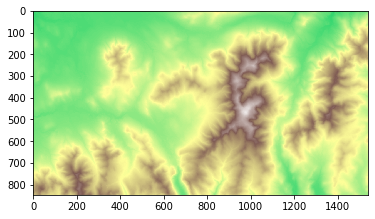

In [3]:
# Show a hysometric tint
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.show()

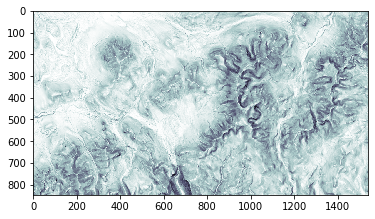

In [4]:
S = neilpy.slope(Z,cellsize=Zt[0],z_factor=1,return_as='degrees')
plt.imshow(S,cmap='bone_r')
plt.show()

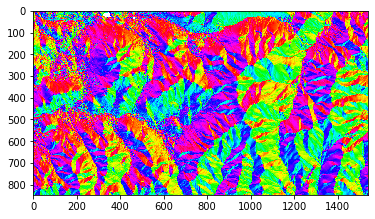

In [5]:
A = neilpy.aspect(Z,return_as='degrees',flat_as='nan')
plt.imshow(A,cmap='hsv')
plt.show()

Text(0.5, 1.0, 'Cross Sectional Curvature (standard)')

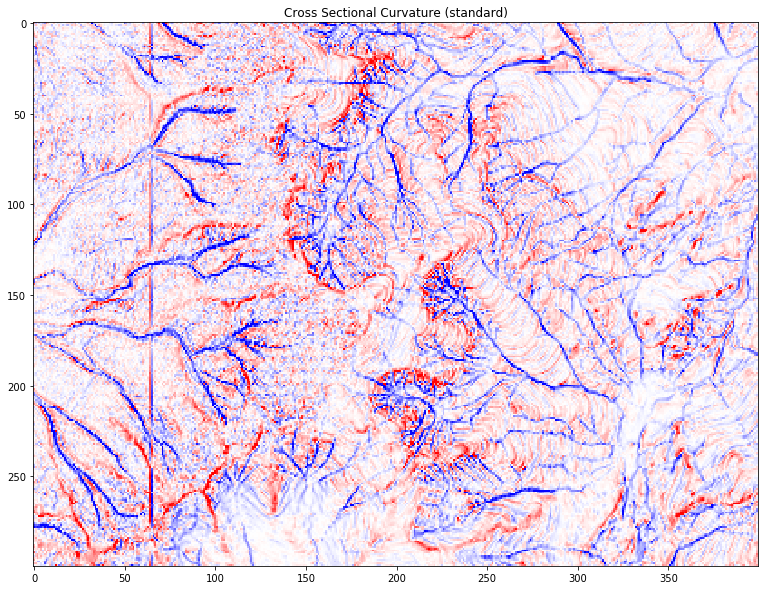

In [7]:
C, C_plan, C_profile = neilpy.esri_curvature(Z,cellsize=Zt[0])
plt.figure(figsize=(15,10))
plt.imshow(C[300:600,800:1200],'bwr',vmin=-1,vmax=1)
plt.title('Cross Sectional Curvature (standard)')

Text(0.5, 1.0, 'Plan Curvature')

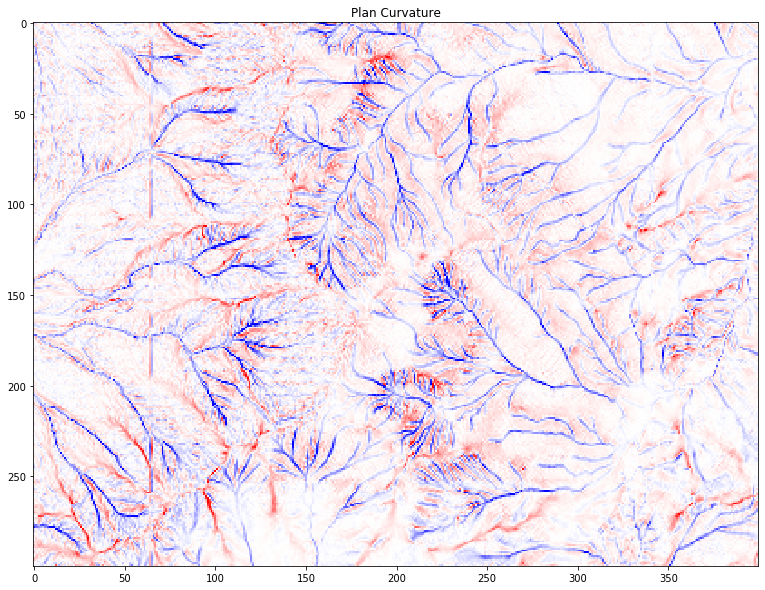

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(C_plan[300:600,800:1200],'bwr',vmin=-1,vmax=1)
plt.title('Plan Curvature')

Text(0.5, 1.0, 'Profile Curvature')

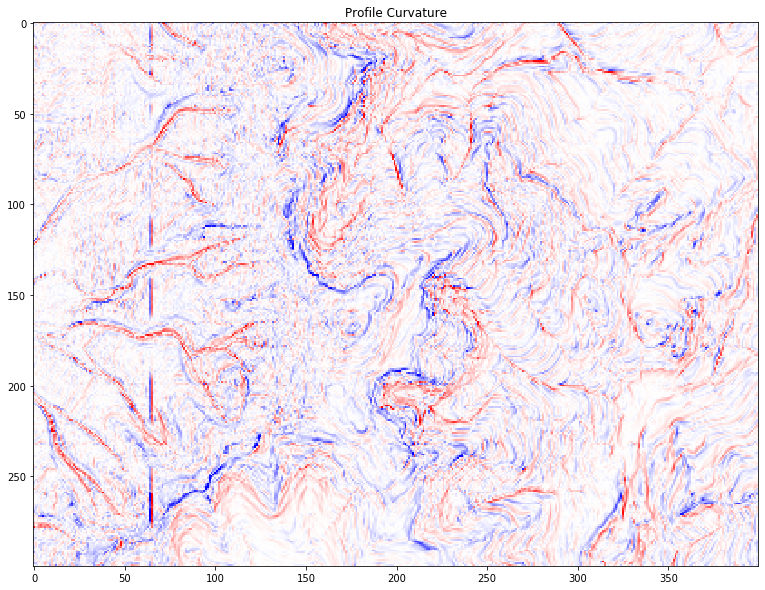

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(C_profile[300:600,800:1200],'bwr',vmin=-1,vmax=1)
plt.title('Profile Curvature')

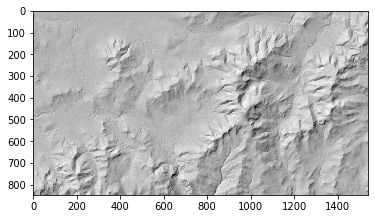

In [10]:
H = neilpy.hillshade(Z,cellsize=Zt[0],zenith=45,azimuth=315)
plt.imshow(H,cmap='gray',vmin=0,vmax=255)
plt.show()

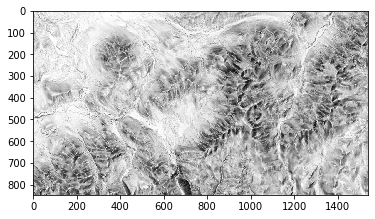

In [11]:
# Multiple Illumination will run several hillshades based on a supplied array or number of zeniths and/or azimuths:
MH = neilpy.multiple_illumination(Z,cellsize=Zt[0],z_factor=1,zeniths=1,azimuths=3);
plt.imshow(MH,cmap='gray_r')
plt.show()

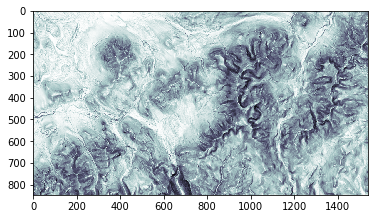

In [8]:
# The PSSM applies a vertical exaggeration to the raster.  Use reverse=True for an "x-ray" like image.
P = neilpy.pssm(Z,cellsize=Zt[0],reverse=False)
plt.imshow(P)
plt.show()

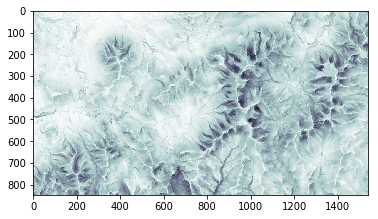

In [10]:
# Skyview Factor uses the mean of the sin of the maximum slopes in each direction
SV = neilpy.skyview_factor(Z,cellsize=Zt[0],lookup_pixels=20)
plt.imshow(SV,'bone')
plt.show()

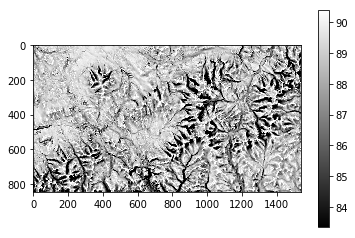

In [9]:
O = neilpy.openness(Z,cellsize=Zt[0],lookup_pixels=10)
plt.imshow(O,cmap='gray',vmin=np.percentile(O,5),vmax=np.percentile(O,95))
plt.colorbar()
plt.show()

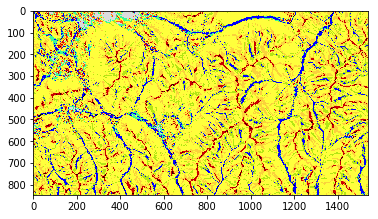

In [10]:
# Calculate the geomorphons (a numeric code, 1-10)
G = neilpy.get_geomorphon_from_openness(Z,cellsize=Zt[0],lookup_pixels=20,threshold_angle=1)

# Apply a "standard" colormap and display the image
im = Image.fromarray(G,mode='L')
im.putpalette(neilpy.geomorphon_cmap())
plt.imshow(im)
plt.show()

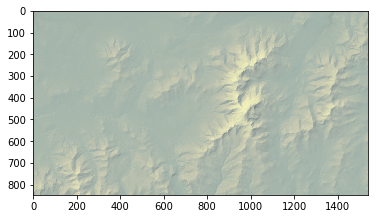

In [11]:
# Swiss shading uses the supplied color table in Jenny and Hurni (2006) to shade the image

SW = neilpy.swiss_shading(Z,Zt[0])
plt.imshow(SW)
plt.show()

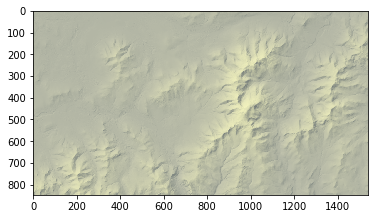

In [12]:
# Alternatively, a lookup tables can be used either by name, or supplied to shade according to elevation and hillshade.
# "swiss" is comparable to the above, but uses a lookup table derived from the corners of Jenny and Hurni's colormap.

SW = neilpy.colortable_shade(Z,'swiss',Zt[0])
plt.imshow(SW)
plt.show()

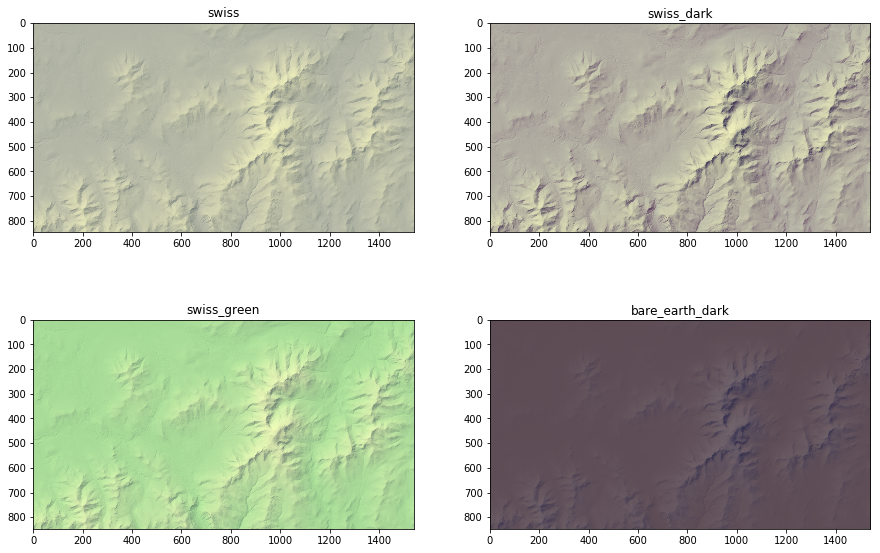

In [14]:
# Several others exist as well:

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(neilpy.colortable_shade(Z,'swiss',Zt[0]))
plt.title('swiss')
plt.subplot(222)
plt.imshow(neilpy.colortable_shade(Z,'swiss_dark',Zt[0]))
plt.title('swiss_dark')
plt.subplot(223)
plt.imshow(neilpy.colortable_shade(Z,'swiss_green',Zt[0]))
plt.title('swiss_green')
plt.subplot(224)
plt.imshow(neilpy.colortable_shade(Z,'bare_earth_dark',Zt[0]))
plt.title('bare_earth_dark')
plt.show()